<a href="https://colab.research.google.com/github/tajbidtousif/CMP7239-ML/blob/main/Session_6_Lab_Intrution_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Task1*** Group Discussion
*italicised text*
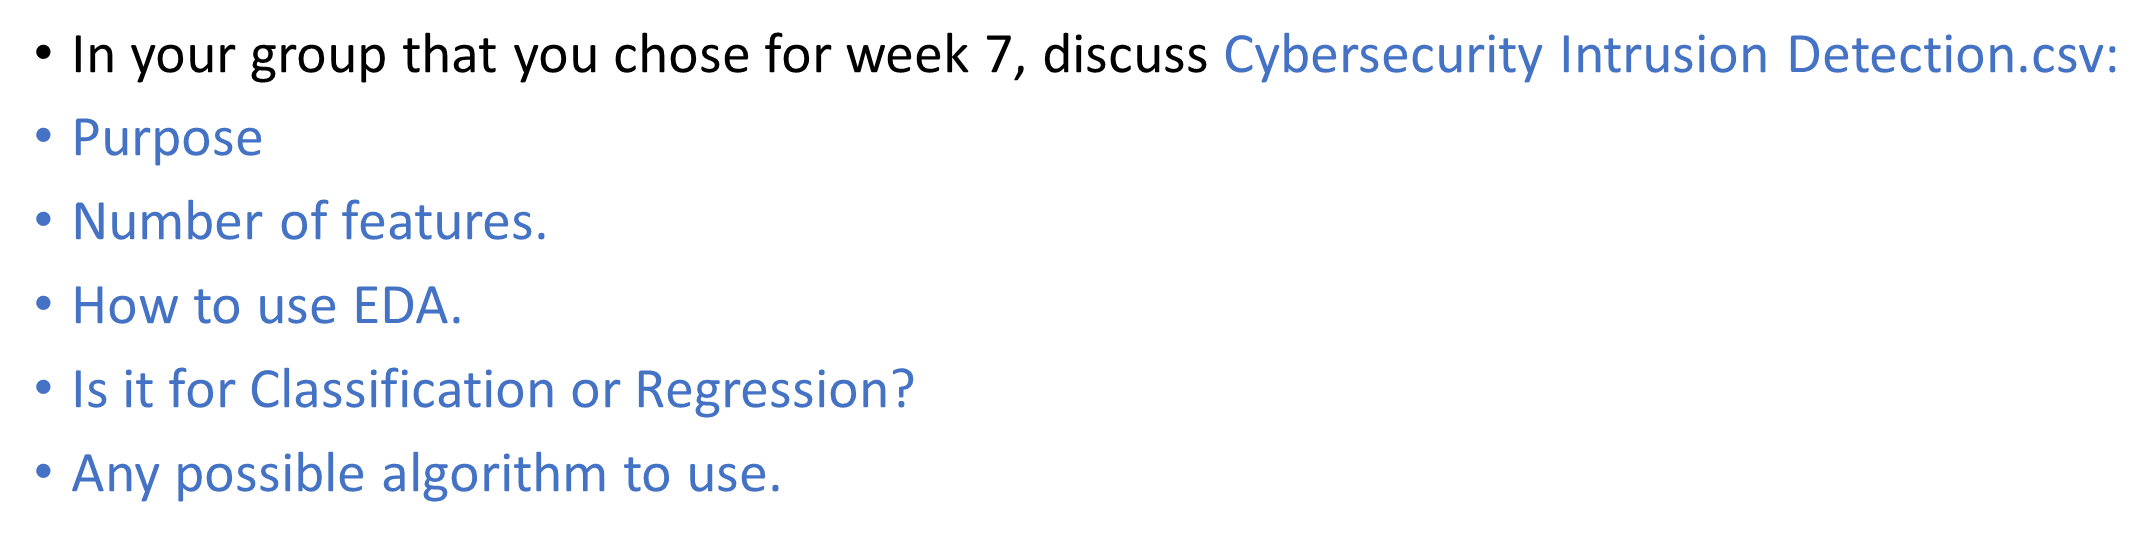

ANS:
**Purpose**: To detect the pattern
**Number of feature**: There are 10 features here. They describe things like the size of the network packets, what protocol was used, how many times someone tried to log in, how long the session lasted, whether encryption was used, if the IP address is suspicious, how many login attempts failed, what browser was used, and if the access happened at a strange time. These help figure out if an attack happened or not.
**How to use EDA**: To use Exploratory Data Analysis (EDA), start by examining your dataset’s structure—check how many rows and columns it has, data types, and any missing values. Next, explore each feature individually by looking at summary statistics and visualizing distributions with histograms or bar charts. Then, analyze relationships between features using scatter plots or correlation matrices to see how they interact. Identify any outliers or unusual data points that might affect your analysis, and check for missing or inconsistent data to decide how to handle it. Finally, summarize your findings to understand key patterns and inform how you clean the data or select features for modeling.
**IDS** is a classification algo
**Algorithm:** Will use Random Forest

***Task2***

Write a paragraph describing the dataset.

Ans:
The dataset contains network session records used for intrusion detection. Each record represents a session with various features capturing network behavior and user activity. These features include session identifiers, network packet sizes, protocol types, the number of login attempts, session durations, and whether encryption was used. Additional attributes such as the reputation score of the IP address, count of failed login attempts, browser type, and whether access occurred at an unusual time provide further context. The target variable, attack_detected, indicates whether the session was identified as malicious or normal. This combination of features allows for analyzing patterns that distinguish between safe and potentially harmful network activities, making it suitable for building machine learning models to detect cyberattacks.

***Task3***

* Read the dataset using Panda and present some features.
* Make sure you use EDA to demonstrate the dataset's features (including the number of intrusion or not).


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [7]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [6]:
print(df.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


So as we can see we have null value in the encryption_used column but at first I have to do encoding. cheers
sorry not cheers now cause have to do more like filling missing values, scaling numeric featureseperating feature and target I mean training and testing value seperation. lets gooo

In [10]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
# gotcha
df.head(15)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0.496899,1,-0.016346,-0.381125,1,1.554930,-0.500779,1,0,1
1,-0.143322,1,-0.525794,0.972960,1,-0.168029,-1.467959,2,0,0
2,0.648132,1,-0.525794,-0.912503,1,2.301950,0.466400,0,0,1
3,1.530327,2,-0.016346,-0.243473,1,-1.174443,-1.467959,4,0,1
4,-0.239103,1,0.493102,-0.330830,0,-1.560484,-0.500779,2,0,0
5,-0.239103,2,0.493102,-0.524175,0,0.514478,0.466400,0,1,0
6,1.585779,0,-0.016346,-0.082183,0,0.465293,-0.500779,0,0,1
7,0.769119,1,-0.525794,-0.991897,1,-1.318646,1.433580,0,1,1
8,-0.476035,1,-1.035242,-0.318093,2,-0.207480,-1.467959,0,1,0
9,0.542269,2,1.002550,-0.331589,2,0.523683,-0.500779,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler


numeric_cols = ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins']


scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [25]:
df.head(20)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0.496899,1,-0.016346,-0.381125,1,1.554930,-0.500779,1,0,1
1,-0.143322,1,-0.525794,0.972960,1,-0.168029,-1.467959,2,0,0
2,0.648132,1,-0.525794,-0.912503,1,2.301950,0.466400,0,0,1
3,1.530327,2,-0.016346,-0.243473,1,-1.174443,-1.467959,4,0,1
4,-0.239103,1,0.493102,-0.330830,0,-1.560484,-0.500779,2,0,0
5,-0.239103,2,0.493102,-0.524175,0,0.514478,0.466400,0,1,0
6,1.585779,0,-0.016346,-0.082183,0,0.465293,-0.500779,0,0,1
7,0.769119,1,-0.525794,-0.991897,1,-1.318646,1.433580,0,1,1
8,-0.476035,1,-1.035242,-0.318093,2,-0.207480,-1.467959,0,1,0
9,0.542269,2,1.002550,-0.331589,2,0.523683,-0.500779,0,0,0


In [23]:
# droping the session_id column
df = df.drop('session_id', axis=1)
df.head()

KeyError: "['session_id'] not found in axis"

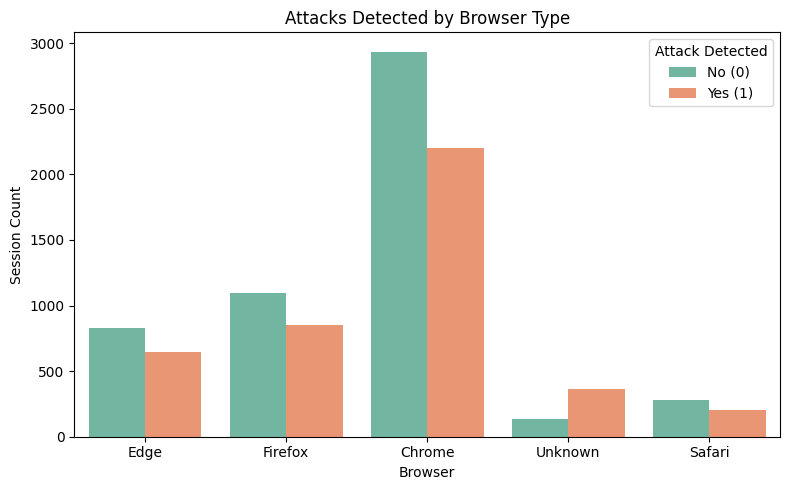

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Define your browser mapping
browser_mapping = {
    0: 'Chrome',
    1: 'Edge',
    2: 'Firefox',
    3: 'Safari',
    4: 'Unknown'
}

# Step 2: Map numeric browser_type to names
df['browser_name'] = df['browser_type'].map(browser_mapping)

# Step 3: Plot browser vs. attack_detected
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='browser_name', hue='attack_detected', palette='Set2')

plt.title('Attacks Detected by Browser Type')
plt.xlabel('Browser')
plt.ylabel('Session Count')
plt.legend(title='Attack Detected', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

***Task4***

* Apply some classification algorithms to classify intrusion or not.
* Make sure to follow Scikit learn library.
* Make sure you save your models.
* Make sure to visualise R, P, OA and F1 score.

In [ ]:
# Task 4 answer here

***Task5***

Now is the time to use the linear regression simulator from the link below

https://www.mladdict.com/linear-regression-simulator

Follow the steps and try to link the concepts with Gradient Descent slides on today session. You may not understand it from the first time, that is fine, just be patient and ask for help. 👼



In [ ]:
# Summarise task 5 answer here

In [ ]:
# By the end of these tasks you should cover good range from the CW1 requirments.

# This is the end of the lab don't forgot to submit and all the best!
